In [1]:
import pickle
import numpy as np
from sklearn import linear_model
import sklearn.metrics as sm
import matplotlib.pyplot as plt

In [2]:
# Input file containing data
input_file = 'data_singlevar_regr.txt'

In [3]:
# Read data
data = np.loadtxt(input_file, delimiter=',')
X, y = data[:, :-1], data[:, -1]

In [4]:
# Train and test split
num_training = int(0.8 * len(X))
num_test = len(X) - num_training
# Training data
X_train, y_train = X[:num_training], y[:num_training]
# Test data
X_test, y_test = X[num_training:], y[num_training:]

In [5]:
# Create linear regressor object
regressor = linear_model.LinearRegression()
# Train the model using the training sets
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# Predict the output
y_test_pred = regressor.predict(X_test)

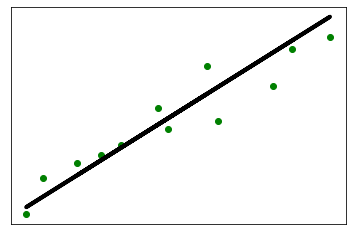

In [7]:
# Plot outputs
plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_test_pred, color='black', linewidth=4)
plt.xticks(())
plt.yticks(())
plt.show()

In [8]:
# Compute performance metrics
print("Linear regressor performance:")
print("Mean absolute error =", round(sm.mean_absolute_error(y_test,
y_test_pred), 2))
print("Mean squared error =", round(sm.mean_squared_error(y_test,
y_test_pred), 2))
print("Median absolute error =", round(sm.median_absolute_error(y_test,
y_test_pred), 2))
print("Explain variance score =", round(sm.explained_variance_score(y_test,
y_test_pred), 2))
print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))

Linear regressor performance:
Mean absolute error = 0.59
Mean squared error = 0.49
Median absolute error = 0.51
Explain variance score = 0.86
R2 score = 0.86


In [9]:
# Model persistence
output_model_file = 'model.pkl'
# Save the model
with open(output_model_file, 'wb') as f:
    pickle.dump(regressor, f)

In [11]:
# Load the model
with open(output_model_file, 'rb') as f:
    regressor_model = pickle.load(f)

# Perform prediction on test data
y_test_pred_new = regressor_model.predict(X_test)
print("\nNew mean absolute error =", round(sm.mean_absolute_error(y_test,
y_test_pred_new), 2))


New mean absolute error = 0.59
